In [1]:
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from simple_tritium_transport_model import ureg, plot_integrated_top_release, plot_irradiation
from simple_tritium_transport_model import plot_salt_inventory, plot_top_release

ureg.mpl_formatter = "{:~P}"

COLLECTION_VOLUME = 10 * ureg.ml
LSC_SAMPLE_VOLUME = 10 * ureg.ml

In [2]:
import baby_run_3
model_run_3 = baby_run_3.baby_model
model_run_3.run(6 * ureg.days)

/home/remidm/miniconda3/envs/libra-calculations/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [3]:
import baby_run_4
model_run_4 = baby_run_4.baby_model
model_run_4.run(6 * ureg.day)

In [4]:
import baby_run_5
model_run_5 = baby_run_5.baby_model

model_run_5.run(7 * ureg.day)

In [5]:
import baby_run_6
model_run_6 = baby_run_6.baby_model

model_run_6.run(7 * ureg.day)

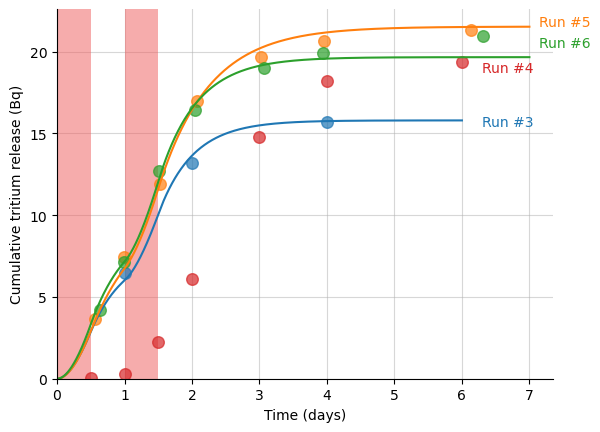

In [10]:
plt.figure()

plot_irradiation(model_run_3, facecolor="#EF5B5B", alpha=0.5)

color_run_3 = "tab:blue"
color_run_4 = "tab:red"
color_run_5 = "tab:orange"
color_run_6 = "tab:green"

plot_integrated_top_release(model_run_3, color=color_run_3, label="Run #3")

plt.scatter(
    baby_run_3.replacement_times,
    baby_run_3.cumulative_release,
    s=70,
    color=color_run_3,
    alpha=0.7,
)

plot_integrated_top_release(model_run_5, color=color_run_5, label="Run #5")

plt.scatter(
    baby_run_5.replacement_times,
    baby_run_5.cumulative_release,
    s=70,
    color=color_run_5,
    alpha=0.7,
)

plot_integrated_top_release(
    model_run_6, color=color_run_6, label="Run #6"
)

plt.scatter(
    baby_run_6.replacement_times,
    baby_run_6.cumulative_release,
    s=70,
    color=color_run_6,
    alpha=0.7,
)

plt.scatter(
    baby_run_4.replacement_times,
    baby_run_4.cumulative_release,
    s=70,
    color=color_run_4,
    alpha=0.7,
)

# plt.annotate("Run #4", (6 * ureg.days, 18 * ureg.Bq), color=color_run_4)

plt.xlim(left=0 * ureg.day)
plt.ylim(bottom=0)
plt.gca().spines[["right", "top"]].set_visible(False)
plt.grid(alpha=0.5)
# plt.legend(reverse=True)
plt.annotate(
    f"Run #3",
    (baby_run_3.baby_model.times[-1] * 1.05, baby_run_3.cumulative_release[-1]),
    color=color_run_3,
    va="center",
)
plt.annotate(
    f"Run #4",
    (baby_run_4.baby_model.times[-1] * 1.05, baby_run_4.cumulative_release[-1] * 0.98),
    color=color_run_4,
    va="center",
)
plt.annotate(
    f"Run #5",
    (baby_run_5.baby_model.times[-1] * 1.02, baby_run_5.cumulative_release[-1] * 1.02),
    color=color_run_5,
    va="center",
)
plt.annotate(
    f"Run #6",
    (baby_run_6.baby_model.times[-1] * 1.02, baby_run_6.cumulative_release[-1] * 0.98),
    color=color_run_6,
    va="center",
)
# labelLines(plt.gca().get_lines(), zorder=2.5)
# plt.gcf().text(0.08, 0.97, "Cumulative tritium release", weight="bold", fontsize=15)
plt.xlabel("Time (days)")
plt.ylabel("Cumulative tritium release (Bq)")
plt.gca().set_axisbelow(True)
plt.savefig("cumulative_release_compare_runs.pdf")

In [7]:
print(model_run_3.k_top)
print(model_run_5.k_top)

print(model_run_3.neutron_rate * model_run_3.TBR)
print(model_run_5.neutron_rate * model_run_5.TBR)

1.47e-06 meter / second
5.5125e-07 meter / second
143035.2 particle / second
354175.0 particle / second


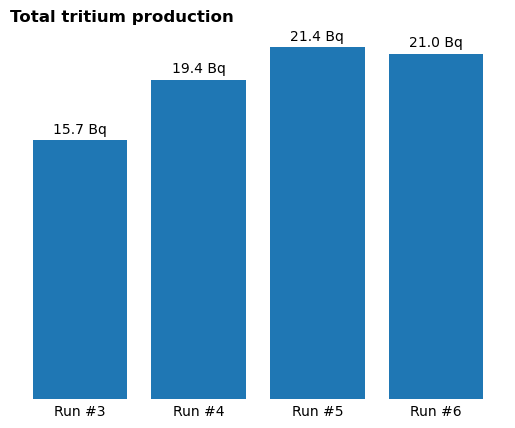

In [8]:
# bar chart for each run the last tritium release
fig, ax = plt.subplots()
bars = ax.bar(
    ["Run #3", "Run #4", "Run #5", "Run #6"],
    [
        baby_run_3.cumulative_release[-1],
        baby_run_4.cumulative_release[-1],
        baby_run_5.cumulative_release[-1],
        baby_run_6.cumulative_release[-1],
    ],
)
# x labels but no ticks
ax.tick_params(axis="both", which="both", length=0)
ax.yaxis.set_visible(False)
ax.spines[["right", "top", "left", "bottom"]].set_visible(False)
ax.set_axisbelow(True)
ax.bar_label(bars, fmt="%.1f Bq", padding=3)
plt.title("Total tritium production", loc="left", weight="bold")
plt.savefig("total_tritium_production.pdf")
plt.savefig("total_tritium_production.svg")